In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#pd.options.mode.chained_assignment = None


In [4]:
# Now we need to read in the data
df = pd.read_excel('C:\\Users\\hp\\Downloads\\Movie-Data-Starter-Project.xlsx', sheet_name= 'Movie Data')


In [5]:
#Let's take a sneek peak into our movie data, at least 10 rows of it
df.head(10)


,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($)
0,10 Cloverfield Lane,2016-03-08,https://en.wikipedia.org/wiki/10_Cloverfield_Lane,Thriller,Horror,Dan Trachtenberg,NaN,Mary Elizabeth Winstead,John Goodman,John Gallagher,NaN,NaN,15000000,108300000.0
1,13 Hours: The Secret Soldiers of Benghazi,2016-01-15,https://en.wikipedia.org/wiki/13_Hours:_The_Se...,Action,Thriller,Michael Bay,NaN,James Badge Dale,John Krasinski,Toby Stephens,Pablo Schreiber,Max Martini,45000000,69400000.0
2,2 Guns,2013-08-02,https://en.wikipedia.org/wiki/2_Guns,Action,Crime,Baltasar Kormákur,NaN,Mark Wahlberg,Denzel Washington,Paula Patton,Bill Paxton,Edward James Olmos,61000000,131900000.0
3,21 Jump Street,2012-03-16,https://en.wikipedia.org/wiki/21_Jump_Street_(...,Comedy,Action,Phil Lord,Chris Miller,Jonah Hill,Channing Tatum,Ice Cube,Brie Larson,Rob Riggle,55000000,201500000.0
4,22 Jump Street,2014-06-04,https://en.wikipedia.org/wiki/22_Jump_Street,Action,Comedy,Phil Lord,Chris Miller,Channing Tatum,Jonah Hill,Ice Cube,NaN,NaN,84500000,331300000.0
5,300: Rise of an Empire,2014-03-04,https://en.wikipedia.org/wiki/300:_Rise_of_an_...,Action,Fantasy,Noam Murro,NaN,Rodrigo Santoro,Eva Green,Sullivan Stapleton,Hans Matheson,Lena Headey,110000000,337600000.0
6,42,2013-04-12,https://en.wikipedia.org/wiki/42_(film),Biography,Drama,Brian Helgeland,NaN,Harrison Ford,Chadwick Boseman,Christopher Meloni,Ryan Merriman,Andre Holland,40000000,97500000.0
7,71,2014-02-07,https://en.wikipedia.org/wiki/%252771_(film),Action,Drama,Yann Demange,NaN,Jack O'Connell,Richard Dormer,Sean Harris,Sam Reid,NaN,8100000,2900000.0
8,90 Minutes in Heaven,2015-09-11,https://en.wikipedia.org/wiki/90_Minutes_in_He...,Drama,NaN,Michael Polish,NaN,Hayden Christensen,Kate Bosworth,Dwight Yoakam,Michael W. Smith,NaN,5000000,4800000.0
9,A Good Day to Die Hard,2013-02-14,https://en.wikipedia.org/wiki/A_Good_Day_to_Di...,Action,Thriller,John Moore,NaN,Bruce Willis,Jai Courtney,Sebastian Koch,Yuliya Snigir,Radivoje Bukvić,92000000,304700000.0


In [6]:
#Before cleaning our dataset and analysing, I think it's interesting to know what things have an impact in the revenue a
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
#So, this cell is to check if any field in this dataset has missing values

Movie Title - 0.0%
Release Date - 0.0%
Wikipedia URL - 0.0%
Genre (1) - 0.0%
Genre (2) - 0.484251968503937%
Director (1) - 0.0%
Director (2) - 0.9192913385826772%
Cast (1) - 0.0%
Cast (2) - 0.00984251968503937%
Cast (3) - 0.045275590551181105%
Cast (4) - 0.11023622047244094%
Cast (5) - 0.234251968503937%
Budget ($) - 0.0%
Box Office Revenue ($) - 0.0%


In [7]:
#Data types for our columns
df.dtypes


Movie Title                       object
Release Date              datetime64[ns]
Wikipedia URL                     object
Genre (1)                         object
Genre (2)                         object
Director (1)                      object
Director (2)                      object
Cast (1)                          object
Cast (2)                          object
Cast (3)                          object
Cast (4)                          object
Cast (5)                          object
Budget ($)                         int64
Box Office Revenue ($)           float64
dtype: object

In [8]:
#To change the datatype of the field in the to remove the .00 in the budget & Box Office Revenue cols
df['Budget ($)'] = df['Budget ($)'].astype('int64')
df['Box Office Revenue ($)'] = df['Box Office Revenue ($)'].astype('int64')


In [9]:
#To extract only the year value from the release date column, 
#I created a new column, named it 'Year' and change the datatype into string so that I can call the first 4 values separatly""
df['Year'] = df['Release Date'].astype(str).str[:4]
df


,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($),Year
0,10 Cloverfield Lane,2016-03-08,https://en.wikipedia.org/wiki/10_Cloverfield_Lane,Thriller,Horror,Dan Trachtenberg,NaN,Mary Elizabeth Winstead,John Goodman,John Gallagher,NaN,NaN,15000000,108300000,2016
1,13 Hours: The Secret Soldiers of Benghazi,2016-01-15,https://en.wikipedia.org/wiki/13_Hours:_The_Se...,Action,Thriller,Michael Bay,NaN,James Badge Dale,John Krasinski,Toby Stephens,Pablo Schreiber,Max Martini,45000000,69400000,2016
2,2 Guns,2013-08-02,https://en.wikipedia.org/wiki/2_Guns,Action,Crime,Baltasar Kormákur,NaN,Mark Wahlberg,Denzel Washington,Paula Patton,Bill Paxton,Edward James Olmos,61000000,131900000,2013
3,21 Jump Street,2012-03-16,https://en.wikipedia.org/wiki/21_Jump_Street_(...,Comedy,Action,Phil Lord,Chris Miller,Jonah Hill,Channing Tatum,Ice Cube,Brie Larson,Rob Riggle,55000000,201500000,2012
4,22 Jump Street,2014-06-04,https://en.wikipedia.org/wiki/22_Jump_Street,Action,Comedy,Phil Lord,Chris Miller,Channing Tatum,Jonah Hill,Ice Cube,NaN,NaN,84500000,331300000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,X-Men: Days of Future Past,2014-05-10,https://en.wikipedia.org/wiki/X-Men:_Days_of_F...,Action,Adventure,Bryan Singer,NaN,Hugh Jackman,James McAvoy,Michael Fassbender,Halle Berry,Jennifer Lawrence,200000000,747900000,2014
504,You're Next,2013-08-23,https://en.wikipedia.org/wiki/You%2527re_Next,Horror,NaN,Adam Wingard,NaN,Sharni Vinson,Joe Swanberg,AJ Bowen,Nicholas Tucci,Barbara Crampton,1000000,26800000,2013
505,Zero Dark Thirty,2012-12-19,https://en.wikipedia.org/wiki/Zero_Dark_Thirty,Drama,NaN,Kathryn Bigelow,NaN,Jessica Chastain,Chris Pratt,Joel Edgerton,Kyle Chandler,Jason Clarke,40000000,132800000,2012
506,Zhong Kui: Snow Girl and the Dark Crystal,2015-02-19,https://en.wikipedia.org/wiki/Zhong_Kui:_Snow_...,Romance,Fantasy,Peter Pau,NaN,Li Bingbing,Chen Kun,Yang Zishan,Winston Chao,Bao Bei'er,30000000,64470000,2015


In [10]:
#Now let's order the movies by revenue gen
df.sort_values(by=['Box Office Revenue ($)'], inplace=False, ascending=False)


,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($),Year
82,Despicable Me 2,2013-06-20,https://en.wikipedia.org/wiki/Despicable_Me_2,Comedy,Family,Chris Renaud,Pierre Coffin,Steve Carell,Kristen Wiig,Miranda Cosgrove,Dana Gaier,Elsie Fisher,76000000,970800000,2013
380,The Hobbit: The Battle of the Five Armies,2014-12-01,https://en.wikipedia.org/wiki/The_Hobbit:_The_...,Adventure,Fantasy,Peter Jackson,NaN,Ian McKellen,Martin Freeman,Richard Armitage,Evangeline Lilly,Luke Evans,250000000,956000000,2014
148,Ice Age: Continental Drift,2012-07-13,https://en.wikipedia.org/wiki/Ice_Age:_Contine...,Adventure,NaN,Steve Martino,Mike Thurmeier,Ray Romano,John Leguizamo,Denis Leary,Queen Latifah,Seann William Scott,95000000,877000000,2012
35,Batman v Superman: Dawn of Justice,2016-03-19,https://en.wikipedia.org/wiki/Batman_v_Superma...,Action,NaN,Zack Snyder,NaN,Ben Affleck,Henry Cavill,Amy Adams,Jesse Eisenberg,Diane Lane,250000000,872700000,2016
447,The Twilight Saga: Breaking Dawn – Part 2,2012-11-16,https://en.wikipedia.org/wiki/The_Twilight_Sag...,Fantasy,Drama,Bill Condon,NaN,Kristen Stewart,Robert Pattinson,Michael Sheen,Mackenzie Foy,Billy Burke,120000000,829700000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Lazer Team,2016-01-27,https://en.wikipedia.org/wiki/Lazer_Team,Sci-Fi,Comedy,Matt Hullum,NaN,Burnie Burns,Gavin Free,Michael Jones,Colton Dunn,Allie DeBerry,2400000,1600000,2016
405,The Letters,2015-12-04,https://en.wikipedia.org/wiki/The_Letters_(film),Drama,NaN,William Riead,NaN,Juliet Stevenson,Max von Sydow,Rutger Hauer,Priya Darshini,NaN,1000000,1600000,2015
418,The Oogieloves in the Big Balloon Adventure,2012-08-29,https://en.wikipedia.org/wiki/The_Oogieloves_i...,Family,NaN,Matthew Diamond,NaN,Toni Braxton,Cloris Leachman,Christopher Lloyd,Chazz Palminteri,Cary Elwes,20000000,1100000,2012
20,Ain't Them Bodies Saints,2013-08-16,https://en.wikipedia.org/wiki/Ain%2527t_Them_B...,Drama,NaN,David Lowery,NaN,Casey Affleck,Rooney Mara,Ben Foster,Rami Malek,Keith Carradine,4000000,1000000,2013


In [11]:
pd.set_option('display.max_rows', None)  #To be able to see through allthe data without the ... in the middle as above

In [12]:
#Drop any duplicates
df['Movie Title'].drop_duplicates().sort_values(ascending=True)

0                                   10 Cloverfield Lane
1             13 Hours: The Secret Soldiers of Benghazi
2                                                2 Guns
3                                        21 Jump Street
4                                        22 Jump Street
5                                300: Rise of an Empire
6                                                    42
7                                                    71
8                                  90 Minutes in Heaven
9                                A Good Day to Die Hard
10                                      A Haunted House
11                                    A Haunted House 2
12                                      A Long Way Down
13                                  A Most Violent Year
14                                    A Most Wanted Man
15                                     A Thousand Words
16                          A Walk Among the Tombstones
17                                  A Walk in th

In [13]:
df

,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($),Year
0,10 Cloverfield Lane,2016-03-08,https://en.wikipedia.org/wiki/10_Cloverfield_Lane,Thriller,Horror,Dan Trachtenberg,NaN,Mary Elizabeth Winstead,John Goodman,John Gallagher,NaN,NaN,15000000,108300000,2016
1,13 Hours: The Secret Soldiers of Benghazi,2016-01-15,https://en.wikipedia.org/wiki/13_Hours:_The_Se...,Action,Thriller,Michael Bay,NaN,James Badge Dale,John Krasinski,Toby Stephens,Pablo Schreiber,Max Martini,45000000,69400000,2016
2,2 Guns,2013-08-02,https://en.wikipedia.org/wiki/2_Guns,Action,Crime,Baltasar Kormákur,NaN,Mark Wahlberg,Denzel Washington,Paula Patton,Bill Paxton,Edward James Olmos,61000000,131900000,2013
3,21 Jump Street,2012-03-16,https://en.wikipedia.org/wiki/21_Jump_Street_(...,Comedy,Action,Phil Lord,Chris Miller,Jonah Hill,Channing Tatum,Ice Cube,Brie Larson,Rob Riggle,55000000,201500000,2012
4,22 Jump Street,2014-06-04,https://en.wikipedia.org/wiki/22_Jump_Street,Action,Comedy,Phil Lord,Chris Miller,Channing Tatum,Jonah Hill,Ice Cube,NaN,NaN,84500000,331300000,2014
5,300: Rise of an Empire,2014-03-04,https://en.wikipedia.org/wiki/300:_Rise_of_an_...,Action,Fantasy,Noam Murro,NaN,Rodrigo Santoro,Eva Green,Sullivan Stapleton,Hans Matheson,Lena Headey,110000000,337600000,2014
6,42,2013-04-12,https://en.wikipedia.org/wiki/42_(film),Biography,Drama,Brian Helgeland,NaN,Harrison Ford,Chadwick Boseman,Christopher Meloni,Ryan Merriman,Andre Holland,40000000,97500000,2013
7,71,2014-02-07,https://en.wikipedia.org/wiki/%252771_(film),Action,Drama,Yann Demange,NaN,Jack O'Connell,Richard Dormer,Sean Harris,Sam Reid,NaN,8100000,2900000,2014
8,90 Minutes in Heaven,2015-09-11,https://en.wikipedia.org/wiki/90_Minutes_in_He...,Drama,NaN,Michael Polish,NaN,Hayden Christensen,Kate Bosworth,Dwight Yoakam,Michael W. Smith,NaN,5000000,4800000,2015
9,A Good Day to Die Hard,2013-02-14,https://en.wikipedia.org/wiki/A_Good_Day_to_Di...,Action,Thriller,John Moore,NaN,Bruce Willis,Jai Courtney,Sebastian Koch,Yuliya Snigir,Radivoje Bukvić,92000000,304700000,2013


In [14]:
#So I want to see what things are most correlated to the Revenue
#I beleive that the budget will have a high correlatio, i.e the more money spent on each movie the more revenue generated

<function matplotlib.pyplot.show(close=None, block=None)>

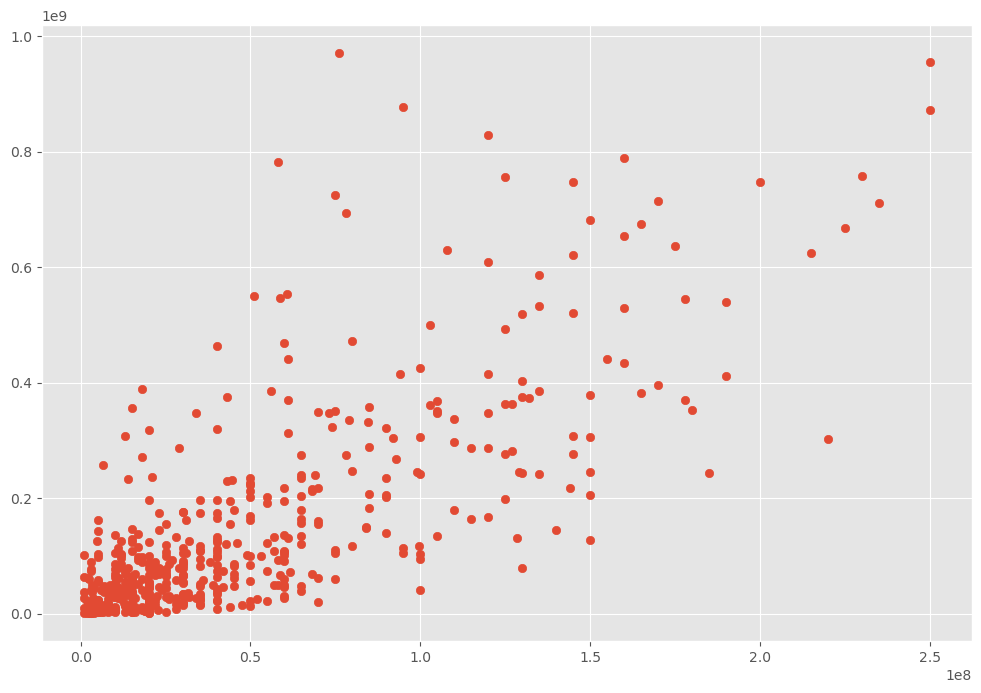

In [15]:
plt.scatter(x=df['Budget ($)'], y=df['Box Office Revenue ($)'])
plt.show

In [16]:
#df =df.sort_values(by=['Box Office Revenue ($)'], inplace=False, ascending=False)

In [17]:
df =df.sort_values(by=['Box Office Revenue ($)'], inplace=False, ascending=False)

In [18]:
df

,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($),Year
82,Despicable Me 2,2013-06-20,https://en.wikipedia.org/wiki/Despicable_Me_2,Comedy,Family,Chris Renaud,Pierre Coffin,Steve Carell,Kristen Wiig,Miranda Cosgrove,Dana Gaier,Elsie Fisher,76000000,970800000,2013
380,The Hobbit: The Battle of the Five Armies,2014-12-01,https://en.wikipedia.org/wiki/The_Hobbit:_The_...,Adventure,Fantasy,Peter Jackson,NaN,Ian McKellen,Martin Freeman,Richard Armitage,Evangeline Lilly,Luke Evans,250000000,956000000,2014
148,Ice Age: Continental Drift,2012-07-13,https://en.wikipedia.org/wiki/Ice_Age:_Contine...,Adventure,NaN,Steve Martino,Mike Thurmeier,Ray Romano,John Leguizamo,Denis Leary,Queen Latifah,Seann William Scott,95000000,877000000,2012
35,Batman v Superman: Dawn of Justice,2016-03-19,https://en.wikipedia.org/wiki/Batman_v_Superma...,Action,NaN,Zack Snyder,NaN,Ben Affleck,Henry Cavill,Amy Adams,Jesse Eisenberg,Diane Lane,250000000,872700000,2016
447,The Twilight Saga: Breaking Dawn – Part 2,2012-11-16,https://en.wikipedia.org/wiki/The_Twilight_Sag...,Fantasy,Drama,Bill Condon,NaN,Kristen Stewart,Robert Pattinson,Michael Sheen,Mackenzie Foy,Billy Burke,120000000,829700000,2012
108,Fast & Furious 6,2013-05-17,https://en.wikipedia.org/wiki/Fast_%2526_Furio...,Action,NaN,Justin Lin,NaN,Vin Diesel,Dwayne Johnson,Paul Walker,Michelle Rodriguez,Jordana Brewster,160000000,788700000,2013
79,Deadpool,2016-02-08,https://en.wikipedia.org/wiki/Deadpool_(film),Action,NaN,Tim Miller,NaN,Ryan Reynolds,Gina Carano,T. J. Miller,Ed Skrein,Morena Baccarin,58000000,782600000,2016
336,The Amazing Spider-Man,2012-07-03,https://en.wikipedia.org/wiki/The_Amazing_Spid...,Action,Fantasy,Marc Webb,NaN,Andrew Garfield,Emma Stone,Max Charles,Martin Sheen,Sally Field,230000000,757900000,2012
384,The Hunger Games: Mockingjay – Part 1,2014-11-10,https://en.wikipedia.org/wiki/The_Hunger_Games...,Sci-Fi,Adventure,Francis Lawrence,NaN,Jennifer Lawrence,Josh Hutcherson,Woody Harrelson,Julianne Moore,Donald Sutherland,125000000,755400000,2014
503,X-Men: Days of Future Past,2014-05-10,https://en.wikipedia.org/wiki/X-Men:_Days_of_F...,Action,Adventure,Bryan Singer,NaN,Hugh Jackman,James McAvoy,Michael Fassbender,Halle Berry,Jennifer Lawrence,200000000,747900000,2014


TypeError: 'function' object is not subscriptable

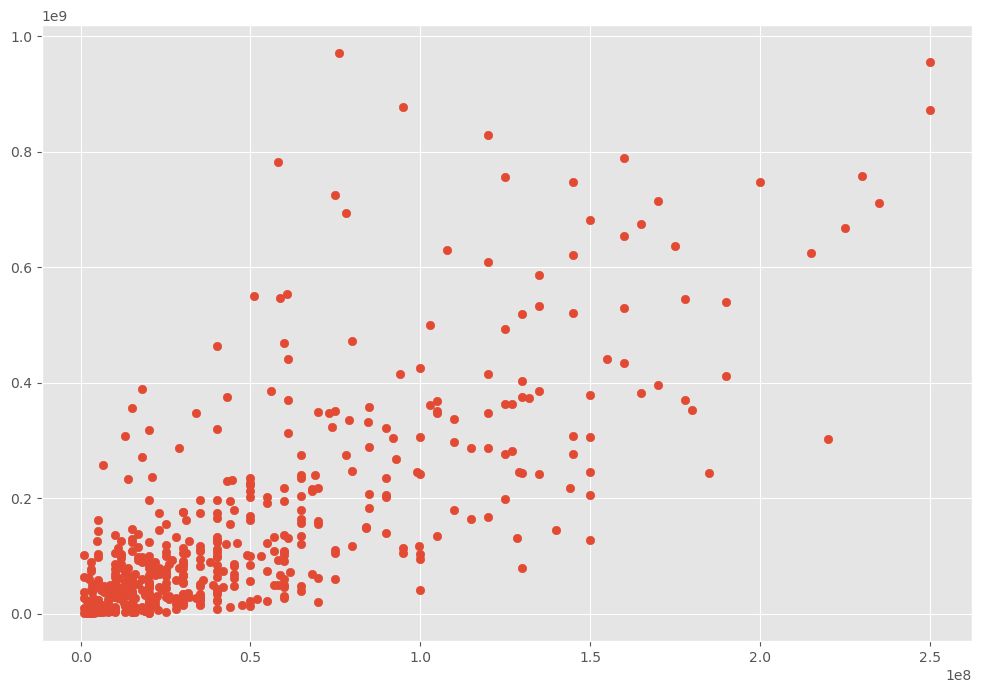

In [19]:
plt.scatter(x=df['Budget ($)'], y=df['Box Office Revenue ($)'])

plt.title['Budget ($) vs Box Office Revenue ($)']
plt.xlabel('Revenue')
plt.ylabel('Budget For Movie')
plt.show()

In [ ]:
#Visualizing the corelation available
plt.scatter(x=df['Budget ($)'], y=df['Box Office Revenue ($)'])

plt.title('Budget vs Box Office Revenue')
plt.xlabel('Revenue') #Where scale is 1 box to 100,000,000m
plt.ylabel('Budget For Movie')  #Where scale is 1 box to 10,000,000
plt.show

<Axes: xlabel='Budget ($)', ylabel='Box Office Revenue ($)'>

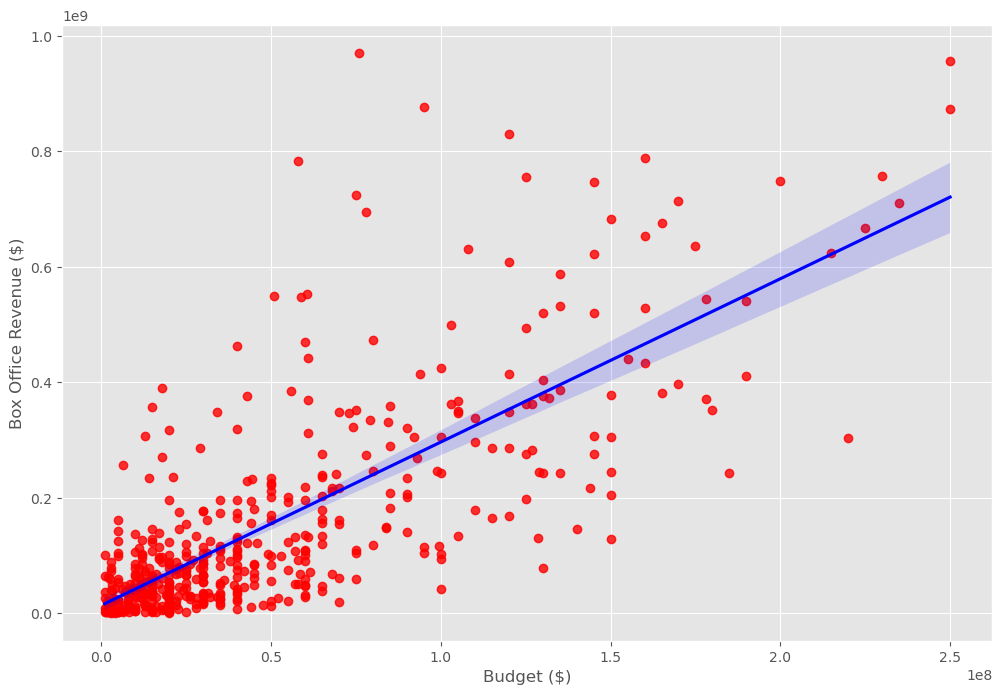

In [22]:
#Plot budget vs revenue using seaborn

sns.regplot(x='Budget ($)', y='Box Office Revenue ($)', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [24]:
#Let's start looking at correlation

In [31]:
df.corr(method='pearson')  #N.B:  .corr only works on numeric fields
#We have diff types of correlation: pearson, kendall, spearman. But by default jupyter usses pearson

C:\Users\hp\AppData\Local\Temp\ipykernel_10372\1242991900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')  #N.B:  .corr only works on numeric fields


,Budget ($),Box Office Revenue ($)
Budget ($),1.00000,0.75924
Box Office Revenue ($),0.75924,1.00000


In [33]:
#High correlation between budget and revenue. I was right!
#Now let me visualize to fully understand how thos conclusion will help

C:\Users\hp\AppData\Local\Temp\ipykernel_10372\2076616854.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


<function matplotlib.pyplot.show(close=None, block=None)>

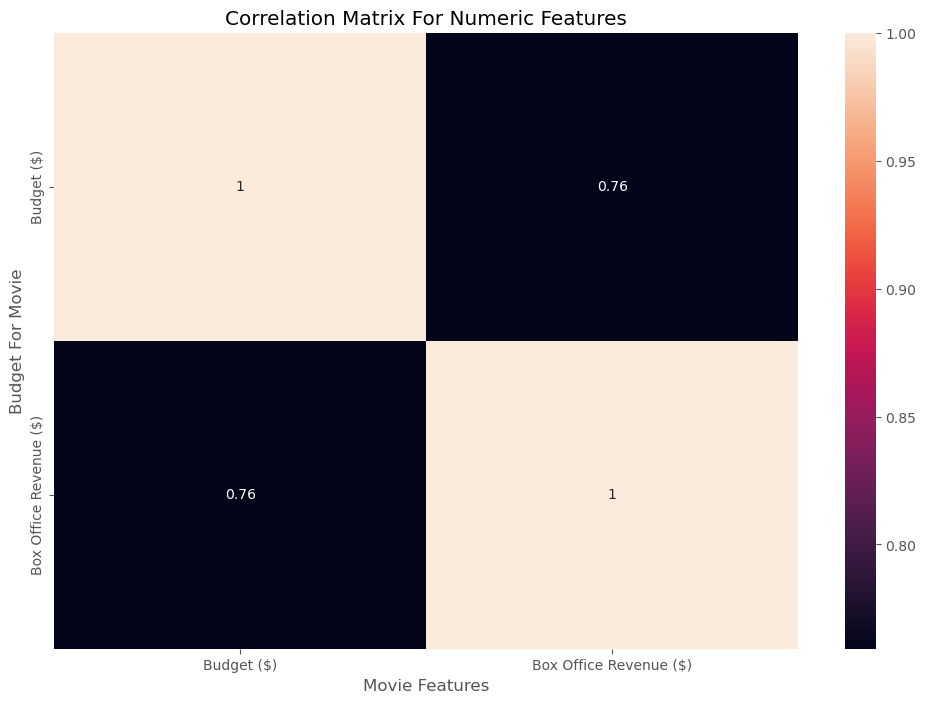

In [36]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features') 
plt.ylabel('Budget For Movie')
plt.show
#Always remember the best practice to properly describe every visualization in my data anaalysis works
#hence I add the following: 
#plt.title('Budget vs Box Office Revenue')
#plt.xlabel('Revenue') #Where scale is 1 box to 100,000,000m
#plt.ylabel('Budget For Movie')

In [1]:
#What is correlation? Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). 
#It's a common tool for describing simple relationships btw two (or more) fields, columns, variables without making a statement about cause and effect.